# Import necessary libraries



In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style='whitegrid')
%matplotlib inline


# Load datasets


In [4]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


# Aggregate transaction data for each customer


In [5]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()



# Merge with customer data

In [6]:
customer_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left').fillna(0)


# Preprocess data for clustering


In [7]:
scaler = StandardScaler()
numeric_cols = ['TotalValue', 'Quantity']
clustering_data = scaler.fit_transform(customer_data[numeric_cols])


# Apply KMeans clustering and evaluate using DB Index


In [8]:
k_values = range(2, 11)
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data)
    db_scores.append(davies_bouldin_score(clustering_data, cluster_labels))


# Plot DB Index for different values of k


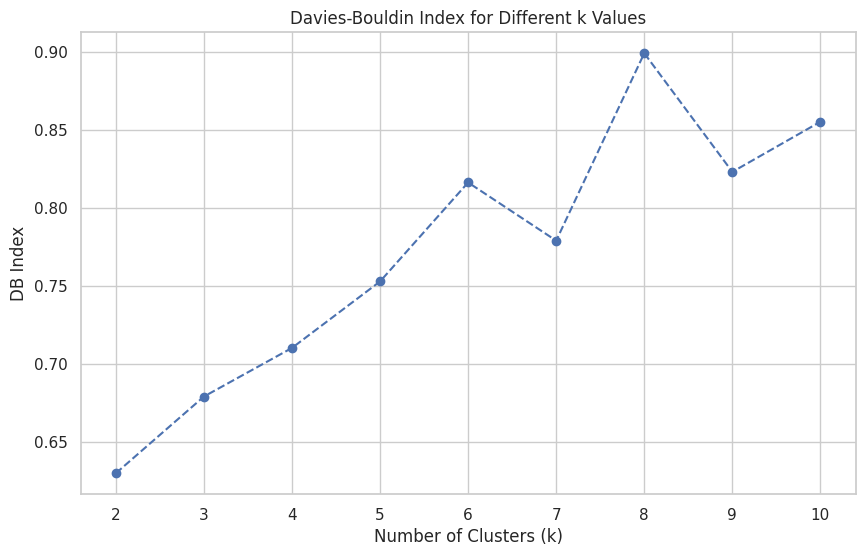

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o', linestyle='--', color='b')
plt.title('Davies-Bouldin Index for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')
plt.show()


# Choose the optimal number of clusters (k) with the lowest DB Index


In [10]:
optimal_k = k_values[db_scores.index(min(db_scores))]
print(f"Optimal number of clusters: {optimal_k}")



Optimal number of clusters: 2


# Perform final clustering with optimal k


In [11]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(clustering_data)


# Visualize the clusters


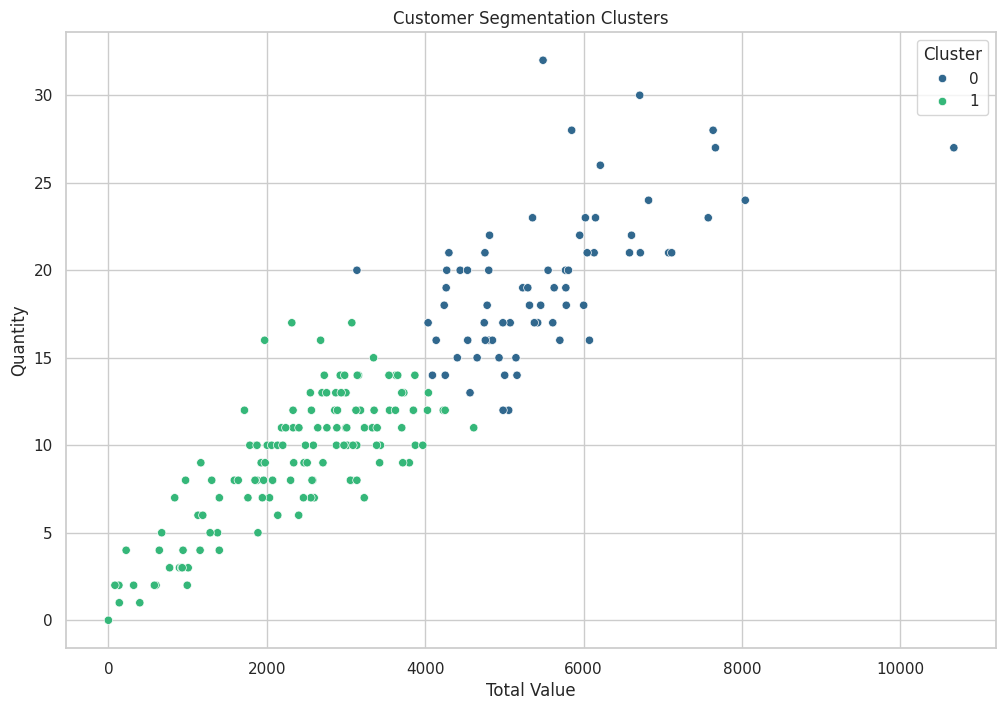

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=customer_data['TotalValue'], y=customer_data['Quantity'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()


# Save clustering results to a CSV file


In [13]:
customer_data.to_csv('Clustering_Results.csv', index=False)
print("Clustering results saved to Clustering_Results.csv.")

Clustering results saved to Clustering_Results.csv.
